# Classification

*Supervised* machine learning techniques involve training a model to operate on a set of *features* and predict a *label* using a dataset that includes some already-known label values. You can think of this function like this, in which ***y*** represents the label we want to predict and ***X*** represents the vector of features the model uses to predict it.

$$y = f([x_1, x_2, x_3, ...])$$


*Classification* is a form of supervised machine learning in which you train a model to use the features (the ***x*** values in our function) to predict a label (***y***) that calculates the probability of the observed case belonging to each of a number of possible classes, and predicting an appropriate label. The simplest form of classification is *binary* classification, in which the label is 0 or 1, representing one of two classes; for example, "True" or "False"; "Internal" or "External"; "Profitable" or "Non-Profitable"; and so on. 

### Explore Data for Binary Classification
Let's start by looking at an example of *binary classification*.
We'll train a binary classifier to predict whether or not a patient should be tested for diabetes based on some medical data. Run the following cell to load a CSV file of patent data into a **Pandas** dataframe:

In [1]:
import pandas as pd

# load the training dataset
diabetes = pd.read_csv('data/diabetes.csv')
diabetes.head()

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
0,1354778,0,171,80,34,23,43.509726,1.213191,21,0
1,1147438,8,92,93,47,36,21.240576,0.158365,23,0
2,1640031,7,115,47,52,35,41.511523,0.079019,23,0
3,1883350,9,103,78,25,304,29.582192,1.282870,43,1
4,1424119,1,85,59,27,35,42.604536,0.549542,22,0


This data consists of diagnostic information about some patients who have been tested for diabetes. Scroll to the right if necessary, and note that the final column in the dataset (**Diabetic**) contains the value ***0*** for patients who tested negative for diabetes, and ***1*** for patients who tested positive. This is the label that we will train our mode to predict; most of the other columns (**Pregnancies**,**PlasmaGlucose**,**DiastolicBloodPressure**, and so on) are the features we will use to predict the **Diabetic** label.

Let's separate the features from the labels - we'll call the features ***X*** and the label ***y***:

In [2]:
# Separate features and labels
features = ['Pregnancies','PlasmaGlucose','DiastolicBloodPressure','TricepsThickness','SerumInsulin','BMI','DiabetesPedigree','Age']
label = 'Diabetic'
X, y = diabetes[features].values, diabetes[label].values

for n in range(0,4):
    print("Patient", str(n+1), "\n  Features:",list(X[n]), "\n  Label:", y[n])

Patient 1 
  Features: [0.0, 171.0, 80.0, 34.0, 23.0, 43.50972593, 1.213191354, 21.0] 
  Label: 0
Patient 2 
  Features: [8.0, 92.0, 93.0, 47.0, 36.0, 21.24057571, 0.158364981, 23.0] 
  Label: 0
Patient 3 
  Features: [7.0, 115.0, 47.0, 52.0, 35.0, 41.51152348, 0.079018568, 23.0] 
  Label: 0
Patient 4 
  Features: [9.0, 103.0, 78.0, 25.0, 304.0, 29.58219193, 1.282869847, 43.0] 
  Label: 1


Now let's compare the feature distributions for each label value.

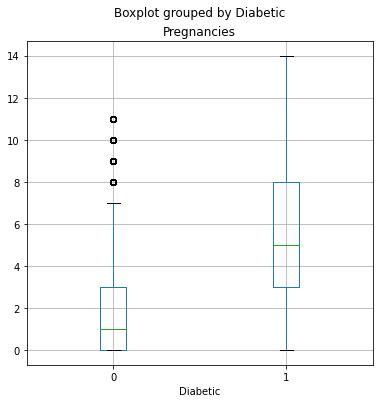

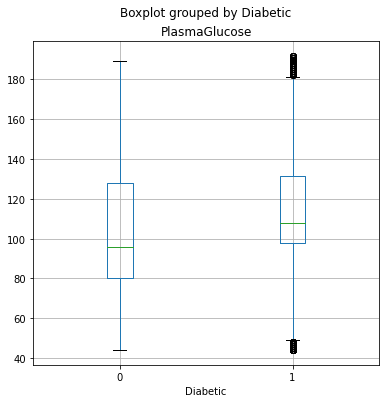

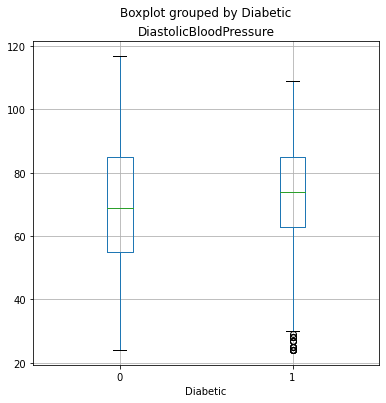

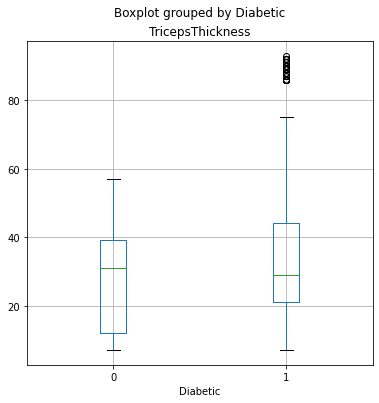

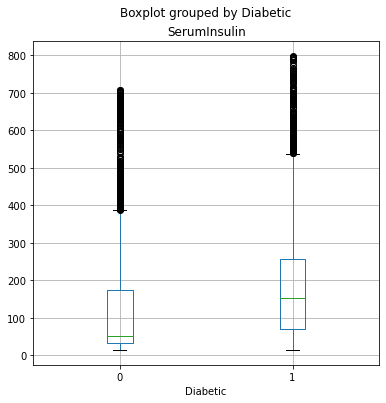

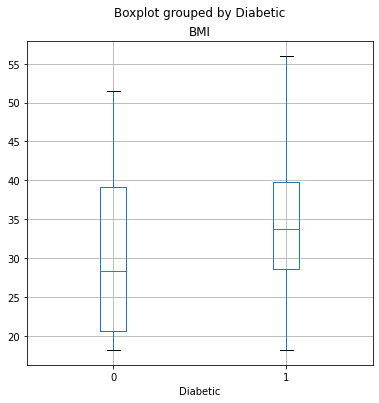

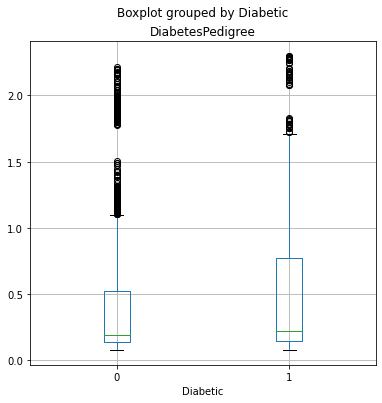

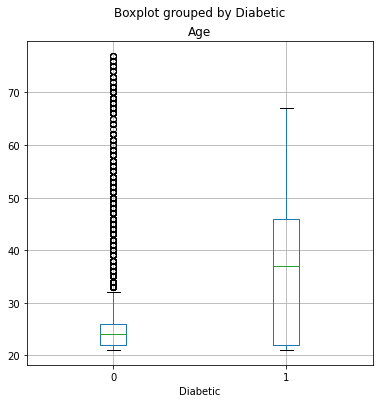

In [4]:
from matplotlib import pyplot as plt
%matplotlib inline

features = ['Pregnancies','PlasmaGlucose','DiastolicBloodPressure','TricepsThickness','SerumInsulin','BMI','DiabetesPedigree','Age']
for col in features:
    diabetes.boxplot(column=col, by='Diabetic', figsize=(6,6))
    plt.title(col)
plt.show()

For some of the features, there's a noticable difference in the distribution for each label value. In particular, **Pregnancies** and **Age** show markedly different distributions for diabetic patients than for non-diabetic patients. These features may help predict whether or not a patient is diabetic.

### Split the data

Our dataset includes known values for the label, so we can use this to train a classifier so that it finds a statistical relationship between the features and the label value; but how will we know if our model is any good? How do we know it will predict correctly when we use it with new data that it wasn't trained with? Well, we can take advantage of the fact we have a large dataset with known label values, use only some of it to train the model, and hold back some to test the trained model - enabling us to compare the predicted labels with the already known labels in the test set.

In Python, the **scikit-learn** package contains a large number of functions we can use to build a machine learning model - including a **train_test_split** function that ensures we get a statistically random split of training and test data. We'll use that to split the data into 70% for training and hold back 30% for testing.

In [5]:
from sklearn.model_selection import train_test_split

# Split data 70%-30% into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

print ('Training cases: %d\nTest cases: %d' % (X_train.size, X_test.size))

Training cases: 84000
Test cases: 36000


### Train and Evaluate a Binary Classification Model
OK, now we're ready to train our model by fitting the training features (**X_train**) to the training labels (**y_train**). There are various algorithms we can use to train the model. In this example, we'll use *Logistic Regression*, which is a well-established algorithm for classification. In addition to the training features and labels, we'll need to set a *regularization* parameter. This is used to counteract any bias in the sample, and help the model generalize well by avoiding *overfitting* the model to the training data.

> **Note**: Parameters for machine learning algorithms are generally referred to as *hyperparameters*.

In [6]:
# Train the model
from sklearn.linear_model import LogisticRegression

# Set regularization rate
reg = 0.01

# train a logistic regression model on the training set
model = LogisticRegression(C=1/reg, solver="liblinear").fit(X_train, y_train)
print (model)

LogisticRegression(C=100.0, solver='liblinear')


Now we've trained the model using the training data, we can use the test data we held back to evaluate how well it predicts. Again, **scikit-learn** can help us do this. Let's start by using the model to predict labels for our test set, and compare the predicted labels to the known labels:

In [7]:
predictions = model.predict(X_test)
print('Predicted labels: ', predictions)
print('Actual labels:    ' ,y_test)

Predicted labels:  [0 0 0 ... 0 1 0]
Actual labels:     [0 0 1 ... 1 1 1]


The arrays of labels are too long to be displayed in the notebook output, so we can only compare a few values. Even if we printed out all of the predicted and actual labels, there are too many of them to make this a sensible way to evaluate the model. Fortunately, **scikit-learn** has a few more tricks up its sleeve, and it provides some metrics that we can use to evaluate the model.

The most obvious thing you might want to do is to check the *accuracy* of the predictions - in simple terms, what proportion of the labels did the model predict correctly?

In [8]:
from sklearn import metrics
from sklearn.metrics import accuracy_score

print('Accuracy: ', accuracy_score(y_test, predictions))

Accuracy:  0.7888888888888889


The accuracy is returned as a decimal value - a value of 1.0 would mean that the model got 100% of the predictions right; while an accuracy of 0.0 is, well, pretty useless!

Accuracy seems like a sensible metric to evaluate (and to a certain extent it is), but you need to be careful about drawing too many conclusions from the accuracy of a classifier. Remember that it's simply a measure of how many cases were predicted correctly. Suppose only 3% of the population is diabetic. You could create a classifier that always just predicts 0, and it would be 97% accurate - but not terribly helpful in identifying patients with diabetes!

Fortunately, there are some other metrics that reveal a little more about how our model is performing.

In [9]:
from sklearn. metrics import classification_report

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.81      0.88      0.85      2986
           1       0.72      0.60      0.66      1514

    accuracy                           0.79      4500
   macro avg       0.77      0.74      0.75      4500
weighted avg       0.78      0.79      0.78      4500



The classification report includes the following metrics:
* *Precision*: The proportion of *positive* (1) predictions that were in fact positive.
* *Recall*: The proportion of actual positive cases that the classifier correctly identified.
* *F1-Score*: An average metric that takes both precision and recall into account.
* *Support*: A weighted average of prevelance for the two classes.

The precision and recall metrics are derived from four core metrics:
* *True Positives*: The predicted label and the actual label are both 1.
* *False Positives*: The predicted label is 1, but the actual label is 0.
* *False Negatives*: The predicted label is 0, but the actual label is 1.
* *True Negatives*: The predicted label and the actual label are both 0.

These metrics are generally shown together as a *confusion matrix*, which takes the following form:

<table style="border: 1px solid black;">
    <tr style="border: 1px solid black;">
        <td style="border: 1px solid black;color: black;" bgcolor="lightgray">TN</td><td style="border: 1px solid black;color: black;" bgcolor="white">FP</td>
    </tr>
    <tr style="border: 1px solid black;">
        <td style="border: 1px solid black;color: black;" bgcolor="white">FN</td><td style="border: 1px solid black;color: black;" bgcolor="lightgray">TP</td>
    </tr>
</table>

Note that the correct (*true*) predictions form a diagonal line from top left to bottom right - these figures should be significantly higher than the *false* predictions if the model is any good.

In Python, you can use the **sklearn.metrics.confusion_matrix** function to find these values for a trained classifier:

In [11]:
from sklearn.metrics import confusion_matrix

# Print the confusion matrix
cm = confusion_matrix(y_test, predictions)
print (cm)

[[2636  350]
 [ 600  914]]


Up until now, we've considered the predictions from the model as being either a 1 or a 0. Actually, things are a little more complex than that. Statistical machine learning algorithms, like logistic regression, are based on *probability*; so what actually gets predicted by a binary classifier is the probability that the label is true (**P(y)**) and the probability that the label is false (1 - **P(y)**). A threshold value of 0.5 is used to decide whether the predicted label is a 1 (*P(y) > 0.5*) or a 0 (*P(y) <= 0.5*). You can use the **predict_proba** method to see the probability pairs for each case:

In [12]:
y_scores = model.predict_proba(X_test)
print(y_scores)

[[0.81673207 0.18326793]
 [0.96317765 0.03682235]
 [0.80900436 0.19099564]
 ...
 [0.60687512 0.39312488]
 [0.10608747 0.89391253]
 [0.63834077 0.36165923]]


The decision to score a prediction as a 1 or a 0 depends on the threshold to which the predicted probabilties are compared. If we were to change the threshold, it would affect the predictions; and therefore change the metrics in the confusion matrix. A common way to evaluate a classifier is to examine the *true positive rate* (which is another name for recall) and the *false positive rate* for a range of possible thresholds. These rates are then plotted against all possible thresholds to form a chart known as a *received operator characteristic (ROC) chart*, like this:

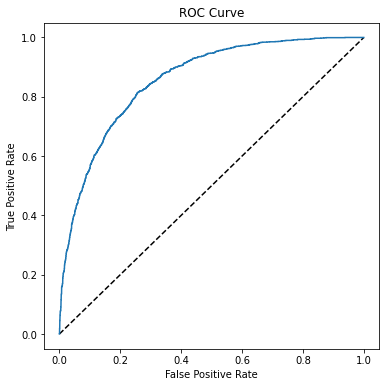

In [14]:
# Evaluate the model
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])

# plot ROC curve
fig = plt.figure(figsize=(6, 6))
# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], 'k--')
# Plot the FPR and TPR achieved by our model
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

The ROC chart shows the curve of the true and false positive rates for different threshold values between 0 and 1. A perfect classifier would have a curve that goes straight up the left side and straight across the top. The diagonal line across the chart represents the probability of predicting correctly with a 50/50 random prediction; so you obviously want the curve to be higher than that (or your model is no better than simply guessing!).

The area under the curve (AUC) is a value between 0 and 1 that quantifies the overall performance of the model. The closer to 1 this value is, the better the model. Once again, Scikit-Learn includes a function to calculate this metric.

In [15]:
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_test,y_scores[:,1])
print('AUC: ' + str(auc))

AUC: 0.8568307761185843


In this case, the ROC curve and its AUC indicate that the model performs better than a random guess.

### Use the Model for Inferencing
Now that we have a reasonably useful trained model, we can save it for use later to predict labels for new data:

In [16]:
import joblib

# Save the model as a pickle file
filename = './models/diabetes_model.pkl'
joblib.dump(model, filename)

['./models/diabetes_model.pkl']

When we have some new observations for which the label is unknown, we can load the model and use it to predict values for the unknown label:

In [17]:
# Load the model from the file
model = joblib.load(filename)

# predict on a new sample
# The model accepts an array of feature arrays (so you can predict the classes of multiple patients in a single call)
# We'll create an array with a single array of features, representing one patient
X_new = [[2,180,74,24,21,23.9091702,1.488172308,22]]
print ('New sample: {}'.format(list(X_new[0])))

# Get a prediction
pred = model.predict(X_new)

# The model returns an array of predictions - one for each set of features submitted
# In our case, we only submitted one patient, so our prediction is the first one in the resulting array.
print('Predicted class is {}'.format(pred[0]))

New sample: [2, 180, 74, 24, 21, 23.9091702, 1.488172308, 22]
Predicted class is 0


### Train a Multiclass Classification Model
Binary classification techniques work well when the data observations belong to one of two classes or categories, such as "True" or "False". When the data can be categorized into more than two classes, you must use a multiclass classification algorithm.

Fortunately, in most machine learning frameworks, including scikit-learn, implementing a multiclass classifier is not significantly more complex than binary classification - and in many cases, the classification algorithm classes used for binary classification implicitly support multiclass classification.

Let's start by examining a dataset that contains observations of multiple classes. We'll use one of the most commonly used examples in machine learning - the ***Iris*** dataset, in which characteristics of iris flowers are recorded along with the specific species of iris.

This dataset is so commonly used in machine learning examples, it's available directly from the scikit-learn library. Run the following cell to load it:

In [18]:
from sklearn import datasets

iris = datasets.load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

The dataset in scikit-learn consists of:
* A description of the dataset
* An array named **data** containing the feature values
* An array named **feature_names** containing the names of the features (*sepal length*, *sepal width*, *petal length*, and *petal width*).
* An array named **target** containing the corresponding labels
* An array named **target_names** containing the species names that correspond to each possible label value (*setosa*, *versicolor*, and *virginica*).

Let's combine the features and label values into a dataframe and look at a sample of them:

In [19]:
import numpy as np
import pandas as pd

features = pd.DataFrame(data = np.c_[iris.data,iris.target], columns = iris.feature_names + ['label'])
features.sample(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
53,5.5,2.3,4.0,1.3,1.0
109,7.2,3.6,6.1,2.5,2.0
33,5.5,4.2,1.4,0.2,0.0
148,6.2,3.4,5.4,2.3,2.0
73,6.1,2.8,4.7,1.2,1.0
36,5.5,3.5,1.3,0.2,0.0
97,6.2,2.9,4.3,1.3,1.0
114,5.8,2.8,5.1,2.4,2.0
47,4.6,3.2,1.4,0.2,0.0
145,6.7,3.0,5.2,2.3,2.0


The labels in the dataset are 0, 1, and 2. Let's see what those labels correspond to in terms of species names:

In [20]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


As with binary classification, we need to split the multiclass data into a set of features and labels for training, and a second set of features and labels for testing the trained model. The dataset from scikit-learn already includes separated features (**iris.data**) and labels (**iris.target**), so we just need to separate these into training and test sets:

In [21]:
from sklearn.model_selection import train_test_split

# Split data 70%-30% into training set and test set
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.30, random_state=0)

print ('Training Set: %d, Test Set: %d \n' % (x_train.size, x_test.size))

print("Sample of features and labels:")
# Take a look at the first 10 training features and corresponding labels
for n in range(0,9):
    print(x_train[n], y_train[n], '(' + iris.target_names[y_train[n]] + ')')

Training Set: 420, Test Set: 180 

Sample of features and labels:
[5.  2.  3.5 1. ] 1 (versicolor)
[6.5 3.  5.5 1.8] 2 (virginica)
[6.7 3.3 5.7 2.5] 2 (virginica)
[6.  2.2 5.  1.5] 2 (virginica)
[6.7 2.5 5.8 1.8] 2 (virginica)
[5.6 2.5 3.9 1.1] 1 (versicolor)
[7.7 3.  6.1 2.3] 2 (virginica)
[6.3 3.3 4.7 1.6] 1 (versicolor)
[5.5 2.4 3.8 1.1] 1 (versicolor)


Now that we have a set of training features and corresponding training labels, we can fit a multiclass classification algorithm to the data to create a model. Most scikit-learn classification algorithms inherently supports multiclass classification. In this example, we'll use another common algorithm called *Random Forest*, which is an example of an *ensemble* algorithm that combines the results of multiple base algorithms:

In [22]:
from sklearn.ensemble import RandomForestClassifier


# train a random forest model on the training set
multi_model = RandomForestClassifier(n_estimators=100).fit(x_train, y_train)
print (multi_model)

RandomForestClassifier()


### Evaluate the Multiclass Classifier
Let's start by predicting the labels for the test features, and comparing the predicted labels to the actual labels:

In [23]:
iris_predictions = multi_model.predict(x_test)
print('Predicted labels: ', iris_predictions[:15])
print('Actual labels   : ' ,y_test[:15])

Predicted labels:  [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1]
Actual labels   :  [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1]


Looks pretty good. What's the overall *accuracy* of the model when used with the test dataset?

In [24]:
from sklearn import metrics
from sklearn.metrics import accuracy_score

print('Accuracy: ', accuracy_score(y_test, iris_predictions))

Accuracy:  0.9777777777777777


OK, how about some other metrics? We can calculate the *precision*, *recall*, and *f1-score* for each class:

In [25]:
from sklearn. metrics import classification_report

print(classification_report(y_test, iris_predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



Now let's look at the confusion matrix for our model:

In [26]:
from sklearn.metrics import confusion_matrix

# Print the confusion matrix
mcm = confusion_matrix(y_test, iris_predictions)
print(mcm)

[[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]


Note that the confusion matrix shows the intersection of predicted and actual label values for each class - in simple terms, the diagonal intersections from top-left to bottom-right indicate the number of correct predictions.

It's generally more intuitive to visualize this as a heat map, like this:

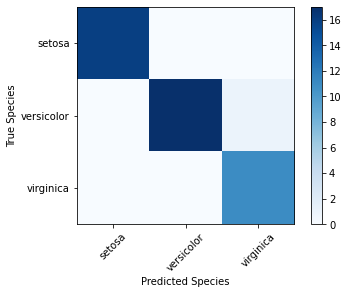

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(mcm, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(iris.target_names))
plt.xticks(tick_marks, iris.target_names, rotation=45)
plt.yticks(tick_marks, iris.target_names)
plt.xlabel("Predicted Species")
plt.ylabel("True Species")
plt.show()

### Use the model with new data observations
As before, let's save our trained model so we can use it again later.

In [28]:
import joblib

# Save the model as a pickle file
filename = './models/iris_model.pkl'
joblib.dump(multi_model, filename)

['./models/iris_model.pkl']

OK, so now we have a trained model. Let's use it to predict the class of a new iris observation:

In [29]:
# Load the model from the file
multi_model = joblib.load(filename)

# The model accepts an array of feature arrays (so you can predict the classes of multiple iris observations in a single call)
# We'll create an array with a single array of features, representing one iris
x_new = [[6.6,3.2,5.8,2.4]]
print ('New sample: {}'.format(x_new[0]))

# The model returns an array of predictions - one for each set of features submitted
# In our case, we only submitted one iris, so our prediction is the first one in the resulting array.
iris_pred = multi_model.predict(x_new)[0]
print('Predicted class is', iris.target_names[iris_pred])

New sample: [6.6, 3.2, 5.8, 2.4]
Predicted class is virginica


You can also submit a batch of iris observations to the model, and get back a prediction for each one.

In [30]:
# This time our input is an array of two feature arrays
x_new = [[6.6,3.2,5.8,2.4],
         [5.6, 2.5, 3.9, 1.1]]
print ('New sample: {}'.format(x_new))

# Call the web service, passing the input data
predictions = multi_model.predict(x_new)

# Get the predicted classes.
for prediction in predictions:
    print(prediction, '(' + iris.target_names[prediction] +')')

New sample: [[6.6, 3.2, 5.8, 2.4], [5.6, 2.5, 3.9, 1.1]]
2 (virginica)
1 (versicolor)


In this notebook, you created a binary classification model and a multiclass classification model.